In [ ]:
pip install pandas scikit-learn imblearn

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [9]:
X = df.drop(columns=['churn','customer_id'], axis=1)
y = df['churn']

In [10]:
X.gender.replace(to_replace='Female', value=0, inplace=True)
X.gender.replace(to_replace='Male', value=1, inplace=True)

C:\Users\drash\AppData\Local\Temp\ipykernel_17100\3368603886.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.gender.replace(to_replace='Female', value=0, inplace=True)
C:\Users\drash\AppData\Local\Temp\ipykernel_17100\3368603886.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [11]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [12]:
X.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
X = pd.get_dummies(X, drop_first=True).copy()

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
sm = SMOTE()
X,y = sm.fit_resample(X,y)

In [16]:
y.value_counts()

churn
1    7963
0    7963
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=354)

In [18]:
X.describe()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
count,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000
mean,648.522856,0.413726,41.011365,4.827703,81702.829037,1.420696,0.623006,0.368580,100958.861723
std,91.295383,0.492516,10.005251,2.725808,61169.153998,0.573805,0.484649,0.482435,57747.495047
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,586.000000,0.000000,34.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51765.407538
50%,650.000000,0.000000,40.000000,5.000000,103419.530000,1.000000,1.000000,0.000000,101403.739085
75%,711.000000,1.000000,47.000000,7.000000,128743.980000,2.000000,1.000000,1.000000,150479.450117
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


<Axes: >

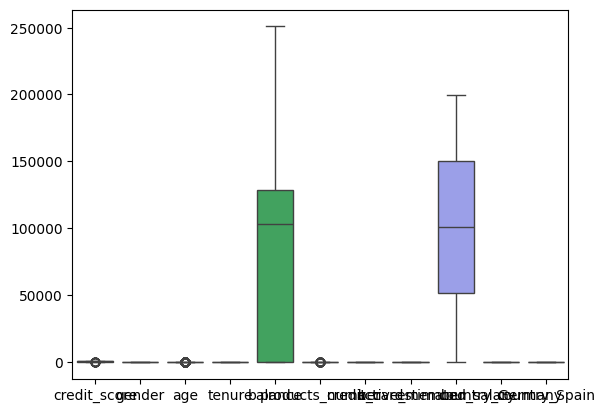

In [19]:
import seaborn as sns

sns.boxplot(X)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[-0.99213494,  1.18299764, -0.50245535, ..., -0.04246177,
        -0.75551609,  1.59062325],
       [-0.4225991 ,  1.18299764,  0.99257283, ...,  1.56113627,
         1.32359854, -0.62868438],
       [-2.20787492, -0.84531022,  0.99257283, ..., -0.52185009,
        -0.75551609, -0.62868438],
       ...,
       [ 0.03741062,  1.18299764, -0.40278681, ...,  1.29239294,
         1.32359854, -0.62868438],
       [ 1.22029275, -0.84531022,  1.39124701, ...,  1.35114306,
         1.32359854, -0.62868438],
       [ 0.54123079,  1.18299764, -1.10046662, ..., -1.72685274,
        -0.75551609,  1.59062325]], shape=(11148, 11))

In [32]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [33]:
pred = model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8028463792381749

In [35]:
import pickle

file_path = "NB_model.pkl"

with open(file_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved successfully to {file_path}")

Model saved successfully to NB_model.pkl


In [36]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [37]:
X.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'country_Germany',
       'country_Spain'],
      dtype='object')